### RcTorch Experiments

In [1]:
import torch
from rctorchprivate import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cd ~/Desktop

/Users/hayden/Desktop


In [3]:
# multi1 = {"tanh" : 1}
# multi2 = {"tanh" : 0.1, "relu" : 0.9}
# multi3 = {"relu" : 0.9, "tanh" : 0.1}
# multi4 = {"tanh" : 0.1, "sin" : 0.9}
# multi5 = {"sin" : 0.9, "tanh" : 0.1}
# multi6 = {"sin" : 0.9, "relu" : 0.1}
# multi7 = {"relu" : 0.9, "sin" : 0.1}
# multi8 = {"tanh" : 0.1, "relu" : 0.85, "sin" : 0.05}
# multi9 = {"tanh" : 0.85, "relu" : 0.1, "sin" : 0.05}
# multi10 = {"sin" : 0.85, "relu" : 0.1, "tanh" : 0.05}
# multi11 = {"sin" : 0.85, "relu" : 0.05, "tanh" : 0.1}
# act_f_list = [multi1, multi2, multi3, multi4, multi5, multi6, multi7, multi8, multi9, multi10, multi11]
act_f_list = [{"tanh":1}, {"relu":1}, {"sin":1}, 
              {"tanh" : 0.1, "relu" : 0.9},
              {"relu" : 0.9, "tanh" : 0.1},
              {"tanh" : 0.1, "sin" : 0.9},
              {"sin" : 0.9, "tanh" : 0.1},
              {"sin" : 0.9, "relu" : 0.1},
              {"relu" : 0.9, "sin" : 0.1},
              {"relu" : 0.5, "sin" : 0.5},
              {"relu" : 0.5, "tanh" : 0.5},
              {"tanh" : 0.5, "sin" : 0.5},
              {"tanh" : 0.33, "relu" : 0.33, "sin" : 0.33},
              {"tanh" : 0.1, "relu" : 0.85, "sin" : 0.05},
              {"tanh" : 0.85, "relu" : 0.1, "sin" : 0.05},
              {"sin" : 0.85, "relu" : 0.1, "tanh" : 0.05},
              {"sin" : 0.85, "relu" : 0.05, "tanh" : 0.1},
              {"tanh" : 0.1, "relu" : 0.8, "sin" : 0.1},
              {"tanh" : 0.8, "relu" : 0.1, "sin" : 0.1},
              {"sin" : 0.8, "relu" : 0.1, "tanh" : 0.1}]
act_f_list_dict = [ {_ : dictt} for _, dictt in enumerate(act_f_list)]
act_f_list_dict

[{0: {'tanh': 1}},
 {1: {'relu': 1}},
 {2: {'sin': 1}},
 {3: {'tanh': 0.1, 'relu': 0.9}},
 {4: {'relu': 0.9, 'tanh': 0.1}},
 {5: {'tanh': 0.1, 'sin': 0.9}},
 {6: {'sin': 0.9, 'tanh': 0.1}},
 {7: {'sin': 0.9, 'relu': 0.1}},
 {8: {'relu': 0.9, 'sin': 0.1}},
 {9: {'relu': 0.5, 'sin': 0.5}},
 {10: {'relu': 0.5, 'tanh': 0.5}},
 {11: {'tanh': 0.5, 'sin': 0.5}},
 {12: {'tanh': 0.33, 'relu': 0.33, 'sin': 0.33}},
 {13: {'tanh': 0.1, 'relu': 0.85, 'sin': 0.05}},
 {14: {'tanh': 0.85, 'relu': 0.1, 'sin': 0.05}},
 {15: {'sin': 0.85, 'relu': 0.1, 'tanh': 0.05}},
 {16: {'sin': 0.85, 'relu': 0.05, 'tanh': 0.1}},
 {17: {'tanh': 0.1, 'relu': 0.8, 'sin': 0.1}},
 {18: {'tanh': 0.8, 'relu': 0.1, 'sin': 0.1}},
 {19: {'sin': 0.8, 'relu': 0.1, 'tanh': 0.1}}]

In [4]:
df = pd.read_csv("rctorch_experiments2.csv", header =0 )
df = df[["Score", "Observer", "f_out", "random_state", "multi"]]
df.head()

,Score,Observer,f_out,random_state,multi
0,0.012766,True,True,108,0
1,0.048557,True,True,108,1
2,0.003812,True,True,108,2
3,0.009224,True,True,108,3
4,0.006186,True,True,108,4


In [5]:
df["Score"] = df["Score"].astype('float32')
#df["multi"] = df["multi"].astype("string")

In [6]:
multi_df = pd.DataFrame(act_f_list)
multi_df = multi_df.fillna(0)
multi_df

,tanh,relu,sin
0,1.00,0.00,0.00
1,0.00,1.00,0.00
2,0.00,0.00,1.00
3,0.10,0.90,0.00
4,0.10,0.90,0.00
5,0.10,0.00,0.90
6,0.10,0.00,0.90
7,0.00,0.10,0.90
8,0.00,0.90,0.10
9,0.00,0.50,0.50


In [7]:
import time

df["relu"] = None
df["tanh"] = None
df["sin"] = None
df.head()

,Score,Observer,f_out,random_state,multi,relu,tanh,sin
0,0.012766,True,True,108,0,None,None,None
1,0.048557,True,True,108,1,None,None,None
2,0.003812,True,True,108,2,None,None,None
3,0.009224,True,True,108,3,None,None,None
4,0.006186,True,True,108,4,None,None,None


In [8]:
df.iloc[:, 4]

0       0
1       1
2       2
3       3
4       4
       ..
315    15
316    16
317    17
318    18
319    19
Name: multi, Length: 320, dtype: int64

In [9]:
for column in multi_df.columns:
    new_col = []
    for row in range(len(df)):
        multi_id = df["multi"][row]
        #print(column)
        new_col.append(multi_df[column][int(multi_id)])
    df[column] = new_col
df

,Score,Observer,f_out,random_state,multi,relu,tanh,sin
0,0.012766,True,True,108,0,0.00,1.00,0.00
1,0.048557,True,True,108,1,1.00,0.00,0.00
2,0.003812,True,True,108,2,0.00,0.00,1.00
3,0.009224,True,True,108,3,0.90,0.10,0.00
4,0.006186,True,True,108,4,0.90,0.10,0.00
...,...,...,...,...,...,...,...,...
315,1.528983,False,False,210,15,0.10,0.05,0.85
316,1.585740,False,False,210,16,0.05,0.10,0.85
317,0.212832,False,False,210,17,0.80,0.10,0.10
318,0.822117,False,False,210,18,0.10,0.80,0.10


In [10]:
df["log_score"] = np.log10(df["Score"])

df["dominant_activation"] = None


In [11]:
#create dominant activation feature
lst = ["relu", "tanh", "sin"]
for i in range(len(df)):
    df.iloc[i, -1] = lst[np.argmax(df.iloc[i][5:8])]
df["n_activations"] = None
lst = ["relu", "tanh", "sin"]
for i in range(len(df)):
    df.iloc[ i, -1] = 3 - sum(df.iloc[i][5:8] == 0)

In [12]:
#create multiple activations feature

df

,Score,Observer,f_out,random_state,multi,relu,tanh,sin,log_score,dominant_activation,n_activations
0,0.012766,True,True,108,0,0.00,1.00,0.00,-1.893931,tanh,1
1,0.048557,True,True,108,1,1.00,0.00,0.00,-1.313753,relu,1
2,0.003812,True,True,108,2,0.00,0.00,1.00,-2.418840,sin,1
3,0.009224,True,True,108,3,0.90,0.10,0.00,-2.035069,relu,2
4,0.006186,True,True,108,4,0.90,0.10,0.00,-2.208622,relu,2
...,...,...,...,...,...,...,...,...,...,...,...
315,1.528983,False,False,210,15,0.10,0.05,0.85,0.184403,sin,3
316,1.585740,False,False,210,16,0.05,0.10,0.85,0.200232,sin,3
317,0.212832,False,False,210,17,0.80,0.10,0.10,-0.671963,relu,3
318,0.822117,False,False,210,18,0.10,0.80,0.10,-0.085066,tanh,3


In [13]:
def activation_comparison_plot(df, output_activation: bool = None, random_state: bool = None, y = "log_score"):
    title = ""
    if output_activation is not None:
        df = df[df["f_out"] == output_activation]
        title += f", tanh output_activation: {output_activation}"
    if random_state is not None:
        df = df[df["random_state"] == random_state]
        title += f", random_state: {random_state}"
    plt.figure(figsize = (12, 6))
    for activation in ["relu", "sin", "tanh"]:
        sns.scatterplot(x = activation, y = y, data = df, alpha = 0.2)
        sns.lineplot(x = activation, y = y, data = df, label = activation)
    plt.xlabel("proportion")
    plt.title(title)

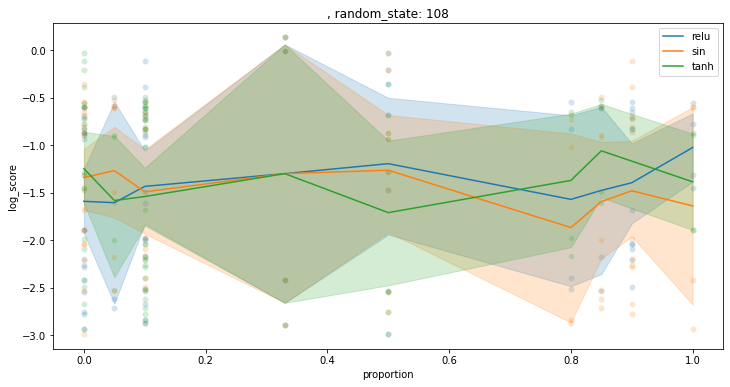

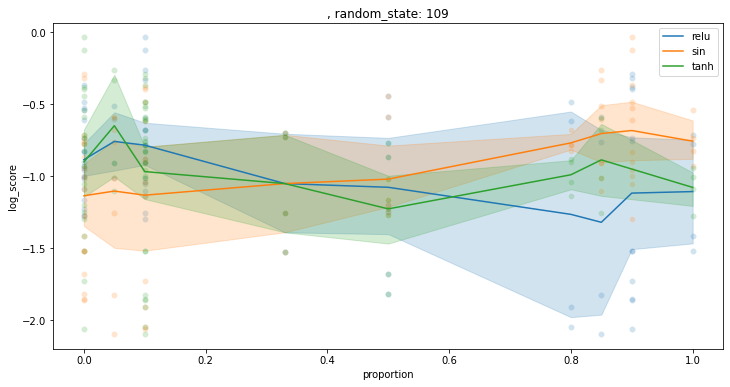

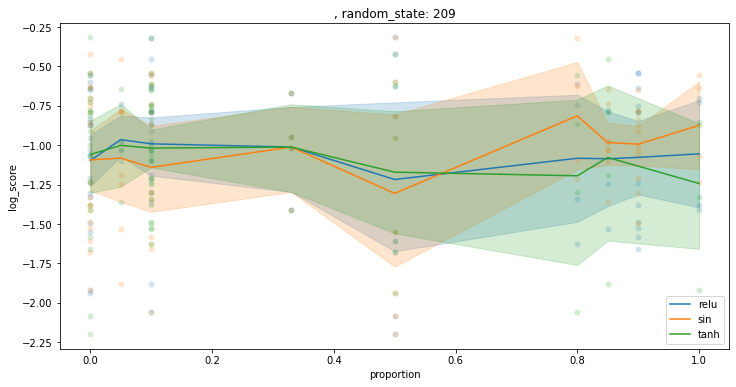

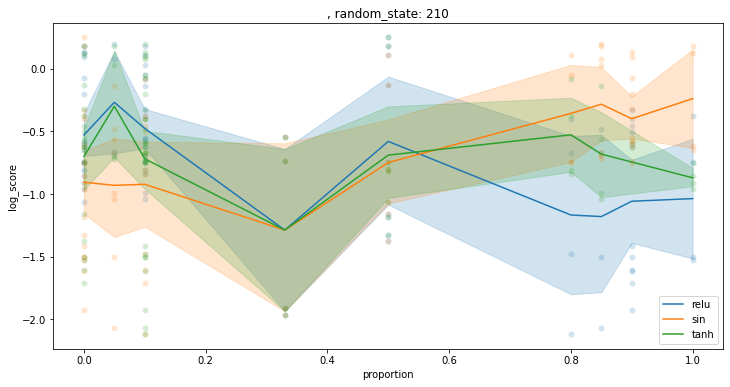

In [14]:
random_states = [108, 109, 209, 210]
for rs in random_states:
    activation_comparison_plot(df, random_state = rs)

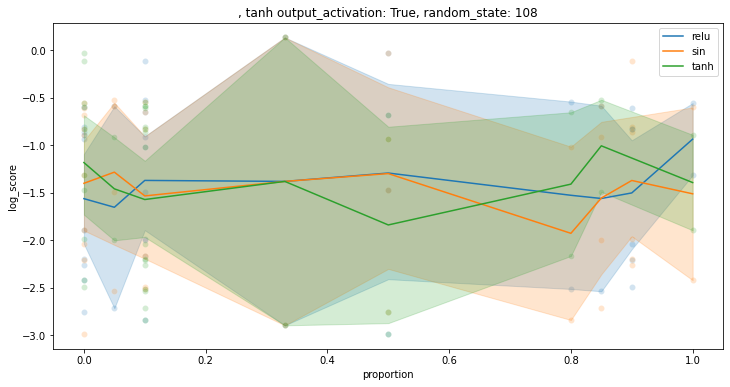

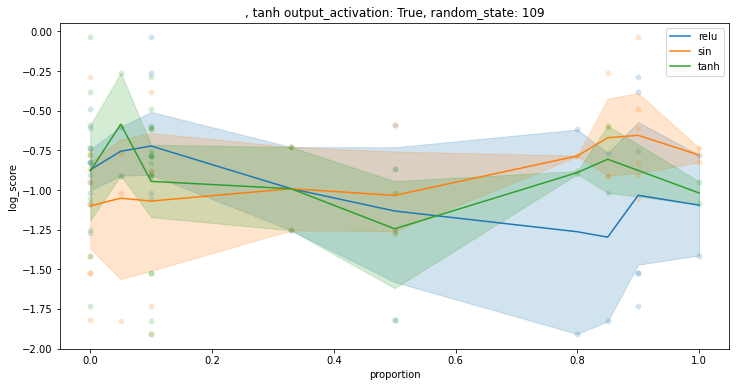

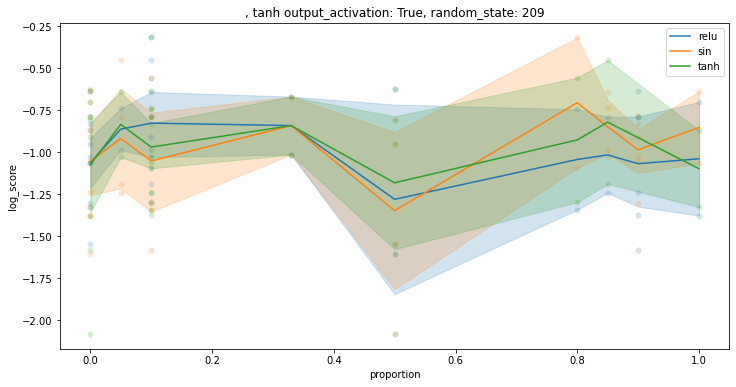

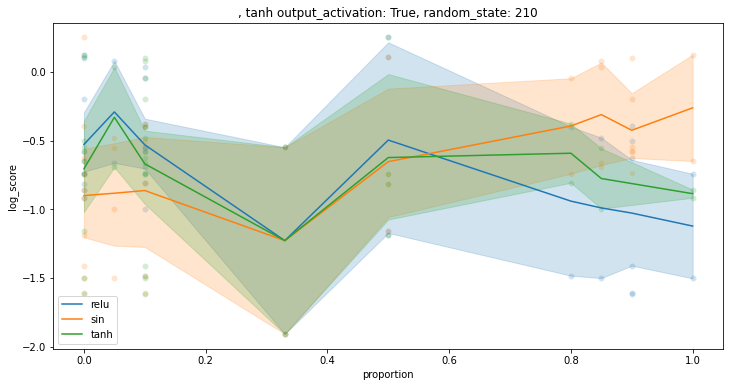

In [15]:
random_states = [108, 109, 209, 210]
for rs in random_states:
    activation_comparison_plot(df, random_state = rs, output_activation = True)
# activation_comparison_plot(df,  , random_state = 109)
# activation_comparison_plot(df, output_activation = False , random_state = 109)

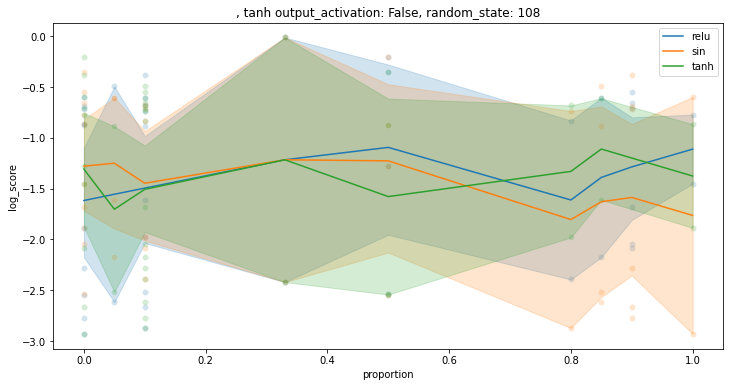

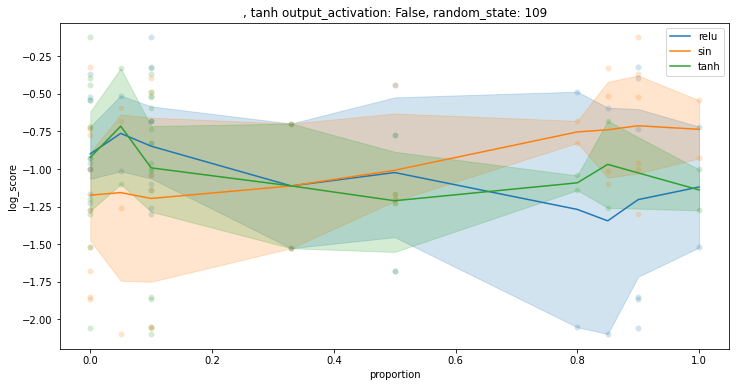

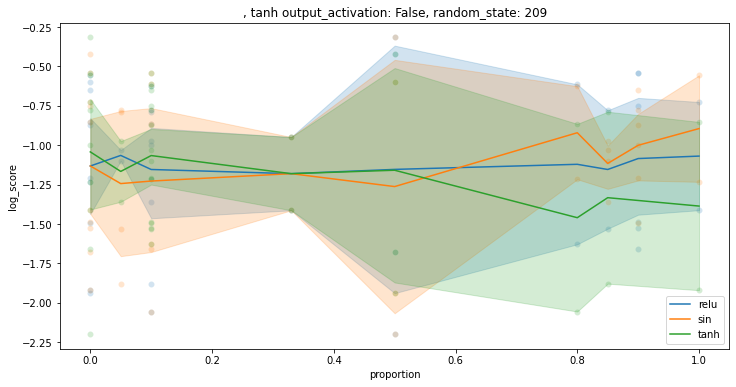

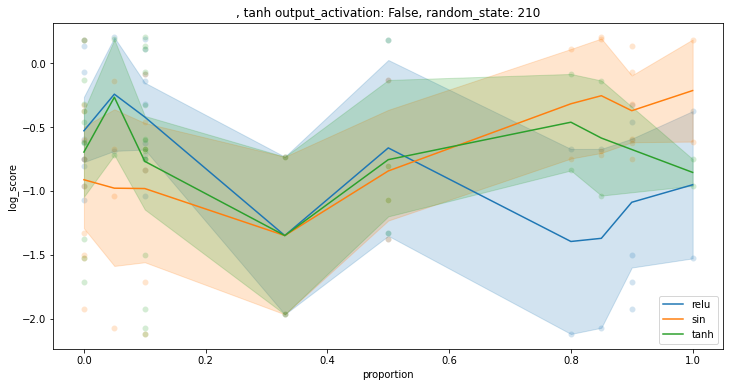

In [16]:
random_states = [108, 109, 209, 210]
for rs in random_states:
    activation_comparison_plot(df, random_state = rs, output_activation = False)

<AxesSubplot:xlabel='multi', ylabel='log_score'>

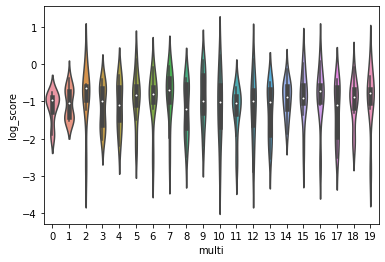

In [17]:
sns.violinplot(x = "multi", y = "log_score", data = df)

In [93]:
#f_out True
def dominant_activation_plot(df, x = "dominant_activation", 
                             y = "log_score", 
                             observer = None, 
                             f_out = None,
                             random_state = None,
                            n_activations = None):
    plt.figure(figsize = (10, 3))
    title = ""
    if f_out is not None:
        df = df[df.f_out == f_out]
        title += f"tanh output activation, {f_out}"
    
    if observer is not None:
        df = df[df.Observer == observer]
        title += f" observer, {observer}"
    
    if random_state is not None:
        df = df[df.random_state == random_state]
        title += f" random_state, {random_state}"
    
    if n_activations is not None:
        df = df[df.n_activations == n_activations]
        title += f" n_activations, {n_activations}"

    means = df.groupby(x).mean()["log_score"]
    print(means)
    if x == "dominant_activation":
        plt.axhline(means[0],label = "relu", color = "orange")
        plt.axhline(means[1], label = "sin", color = 'green')
        plt.axhline(means[2], label = "tanh", color = "blue")
    elif x == "n_activations":
        plt.axhline(means[1], color = "blue", label = "1")#, color = "orange")
        plt.axhline(means[2], color = "orange", label = "2")
        plt.axhline(means[3], color = "green", label = "3")#, color = 'green')

    elif x == "f_out":
        try:
            plt.axhline(means[0], color = "blue", label = "0")#, color = "orange")
            plt.axhline(means[1], color = "orange", label = "1")
        except:
            pass
        #plt.axhline(means[3], color = "green", label = "2")#, color = 'green')
    sns.violinplot(x = x, y = "log_score", data = df)
    plt.title(title)
    plt.legend()
    plt.show()

n_activations
1   -0.659168
2   -0.543556
3   -0.554989
Name: log_score, dtype: float32


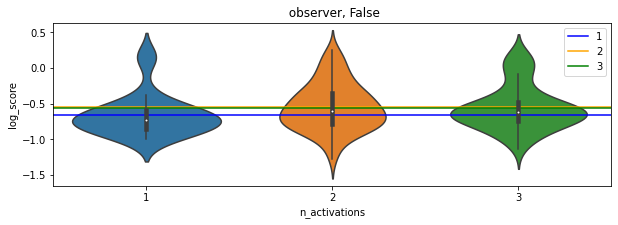

In [94]:
dominant_activation_plot(df, observer = False, x = "n_activations")

In [50]:
df.head()

,Score,Observer,f_out,random_state,multi,relu,tanh,sin,log_score,dominant_activation,n_activations
0,0.012766,True,True,108,0,0.0,1.0,0.0,-1.893931,tanh,1
1,0.048557,True,True,108,1,1.0,0.0,0.0,-1.313753,relu,1
2,0.003812,True,True,108,2,0.0,0.0,1.0,-2.418840,sin,1
3,0.009224,True,True,108,3,0.9,0.1,0.0,-2.035069,relu,2
4,0.006186,True,True,108,4,0.9,0.1,0.0,-2.208622,relu,2


f_out
False   -0.551108
True    -0.579834
Name: log_score, dtype: float32


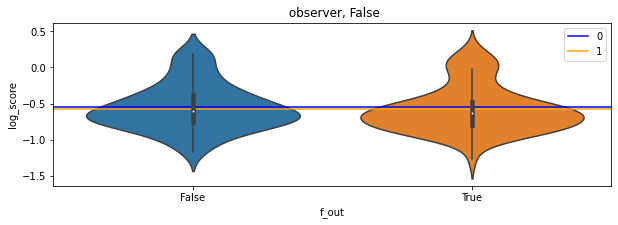

f_out
False   -1.592227
True    -1.457775
Name: log_score, dtype: float32


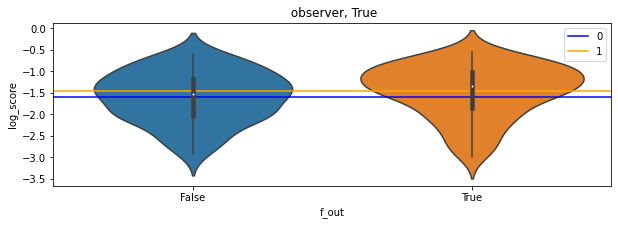

In [104]:
dominant_activation_plot(df, x = "f_out", observer = False)
dominant_activation_plot(df, x = "f_out", observer = True)

f_out
False   -0.606321
True    -0.584345
Name: log_score, dtype: float32


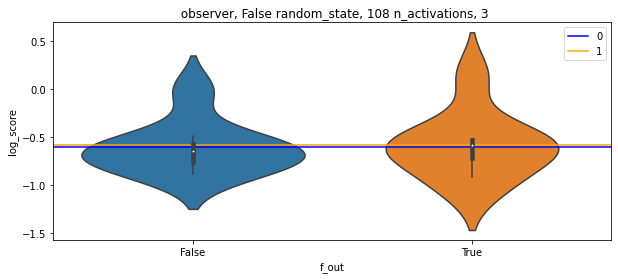

f_out
False   -0.640475
True    -0.654536
Name: log_score, dtype: float32


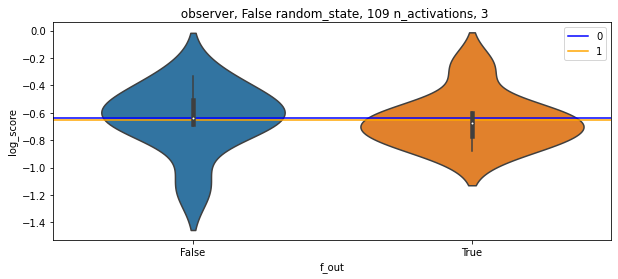

f_out
False   -0.827481
True    -0.614700
Name: log_score, dtype: float32


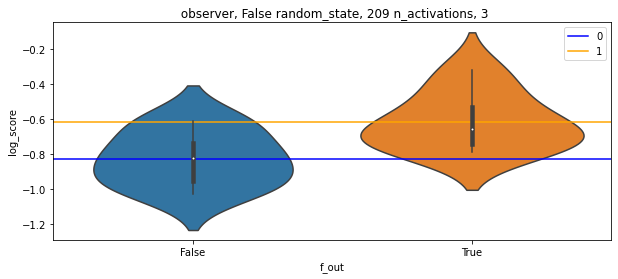

f_out
False   -0.225375
True    -0.286676
Name: log_score, dtype: float32


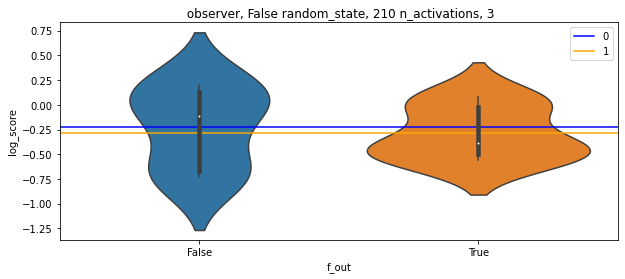

In [56]:
for i in [108, 109, 209, 210]:
    dominant_activation_plot(df, x = "f_out", random_state = i, observer = False, n_activations = 3)

In [66]:
# for i in [108, 109, 209, 210]:
#     dominant_activation_plot(df, x = "f_out", random_state = i, observer = False)

In [67]:
# for i in [108, 109, 209, 210]:
#     dominant_activation_plot(df, x = "f_out")

n_activations
1   -0.659168
2   -0.543556
3   -0.554989
Name: log_score, dtype: float32


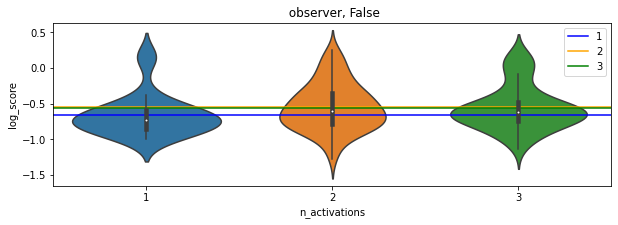

In [117]:
dominant_activation_plot(df, x = "n_activations", observer = False)

n_activations
1   -1.018375
2   -1.123728
3   -1.186000
Name: log_score, dtype: float32


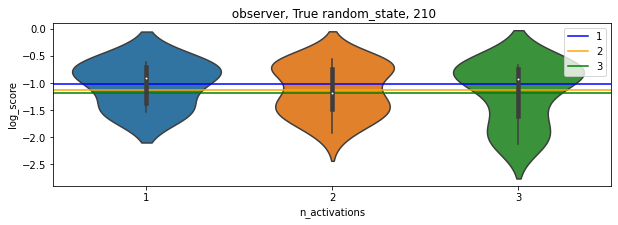

In [122]:
dominant_activation_plot(df, x = "n_activations", observer = True, random_state = 210)

n_activations
1   -1.471749
2   -1.606924
3   -1.620872
Name: log_score, dtype: float32


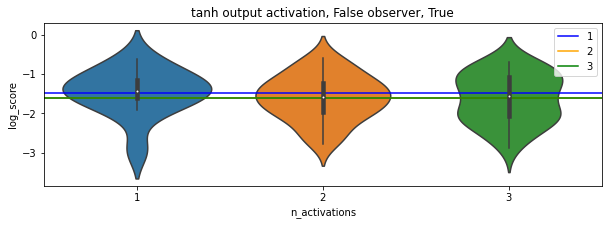

In [113]:
dominant_activation_plot(df, x = "n_activations", f_out = False, observer = True)

n_activations
1   -1.391614
2   -1.556637
3   -1.539430
Name: log_score, dtype: float32


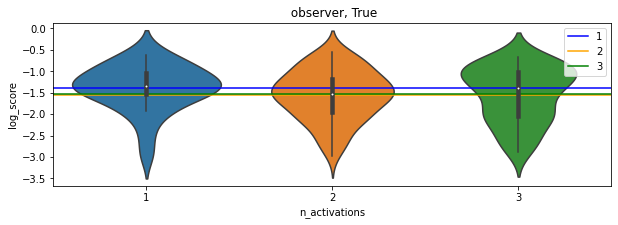

In [114]:
dominant_activation_plot(df, x = "n_activations", observer = True)

n_activations
1   -1.875508
2   -2.264748
3   -2.393198
Name: log_score, dtype: float32


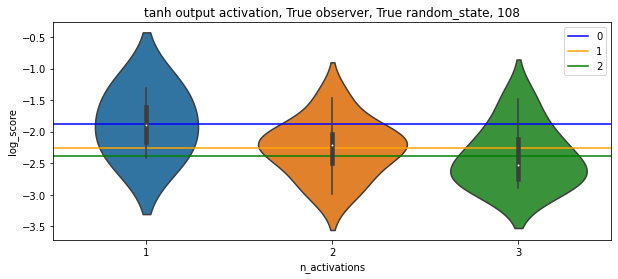

n_activations
1   -1.109595
2   -1.295603
3   -1.189317
Name: log_score, dtype: float32


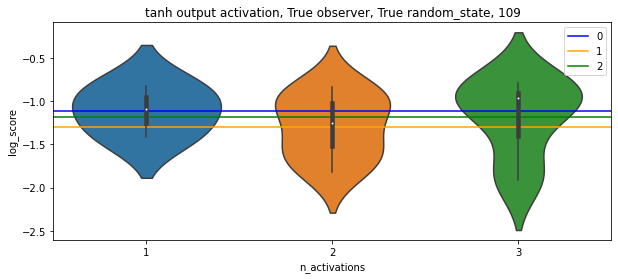

n_activations
1   -1.257936
2   -1.397921
3   -1.150430
Name: log_score, dtype: float32


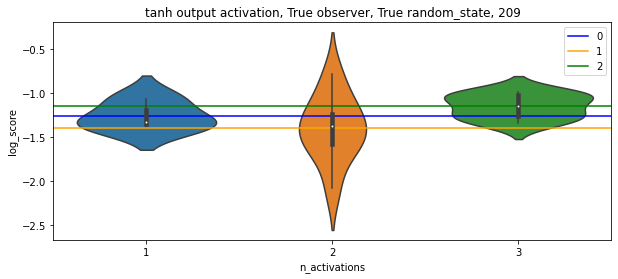

n_activations
1   -1.002878
2   -1.067129
3   -1.099010
Name: log_score, dtype: float32


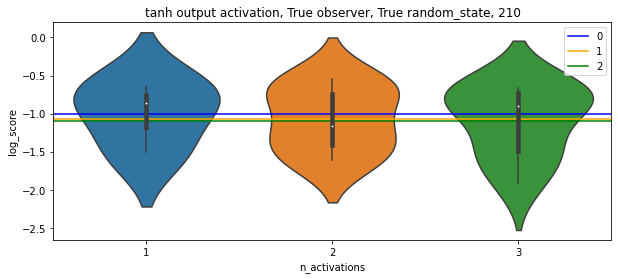

In [70]:
for i in [108, 109, 209, 210]:
    dominant_activation_plot(df, observer = True, x = "n_activations", random_state = i, f_out = True)

f_out
False   -0.551108
True    -0.579834
Name: log_score, dtype: float32


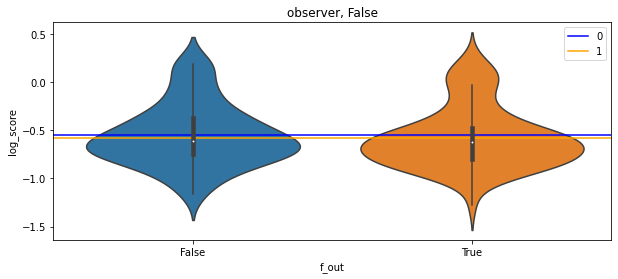

In [24]:
dominant_activation_plot(df, observer = False, x = "f_out")

f_out
False   -1.592227
True    -1.457775
Name: log_score, dtype: float32


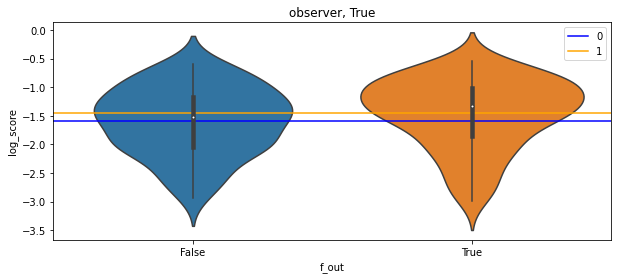

In [25]:
dominant_activation_plot(df, observer = True, x = "f_out")

dominant_activation
relu   -1.735113
sin    -1.316295
tanh   -1.417485
Name: log_score, dtype: float32


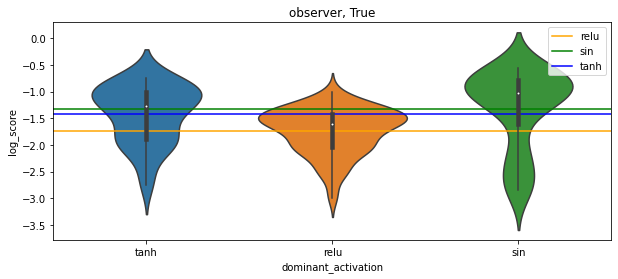

In [26]:
dominant_activation_plot(df, observer = True)

dominant_activation
relu   -1.126886
sin    -0.867644
tanh   -1.040151
Name: log_score, dtype: float32


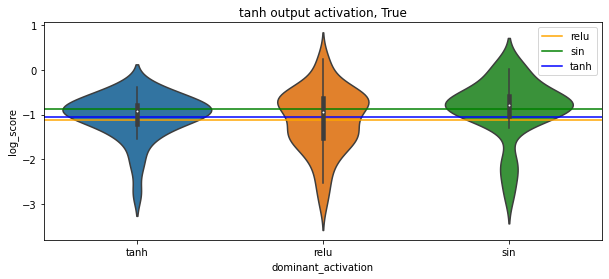

In [27]:
dominant_activation_plot(df, f_out = True)

dominant_activation
relu   -1.156157
sin    -0.925062
tanh   -1.138125
Name: log_score, dtype: float32


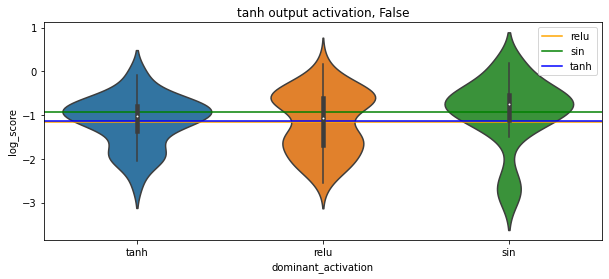

In [28]:
dominant_activation_plot(df, f_out = False)

f_out
False   -0.551108
True    -0.579834
Name: log_score, dtype: float32


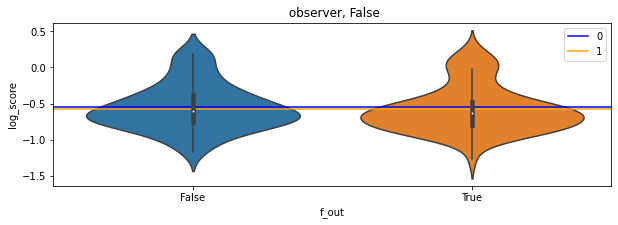

In [102]:
dominant_activation_plot(df, x = "f_out", y = "log_score", observer = False)

f_out
False   -1.424147
True    -1.439026
Name: log_score, dtype: float32


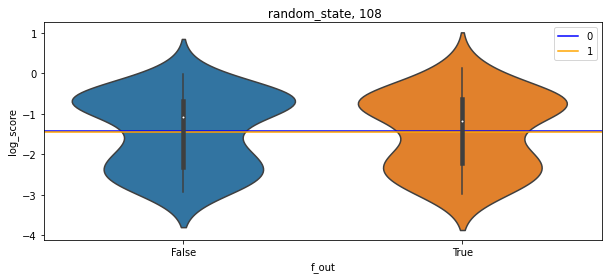

f_out
False   -1.000607
True    -0.937270
Name: log_score, dtype: float32


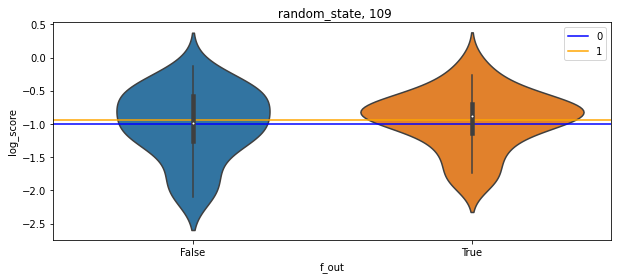

f_out
False   -1.128821
True    -1.001694
Name: log_score, dtype: float32


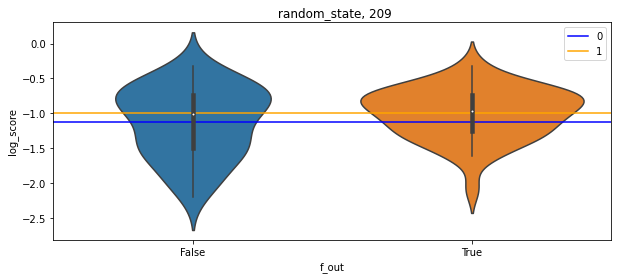

f_out
False   -0.733094
True    -0.697229
Name: log_score, dtype: float32


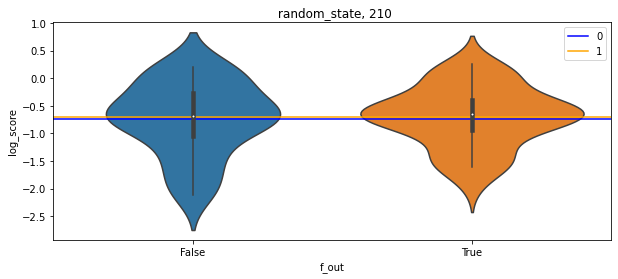

In [86]:
for i in [108, 109, 209, 210]:
    dominant_activation_plot(df, x = "f_out", y = "log_score", random_state = i)
    plt.show()

dominant_activation
relu   -0.547931
sin    -0.476411
tanh   -0.760792
Name: log_score, dtype: float32


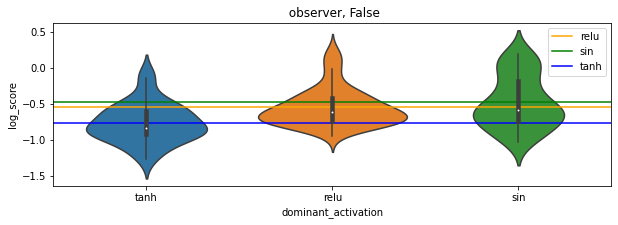

In [100]:
dominant_activation_plot(df, x = "dominant_activation",
                                     y = "log_score", observer = False)

dominant_activation
relu   -2.272331
sin    -2.342798
tanh   -2.076069
Name: log_score, dtype: float32


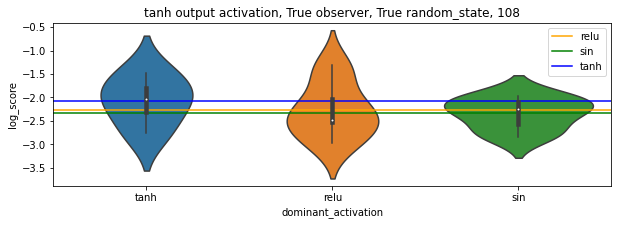

dominant_activation
relu   -2.007484
sin    -2.666281
tanh   -2.005894
Name: log_score, dtype: float32


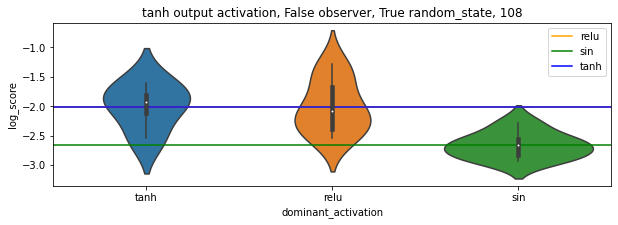

dominant_activation
relu   -0.501278
sin    -0.700722
tanh   -0.747409
Name: log_score, dtype: float32


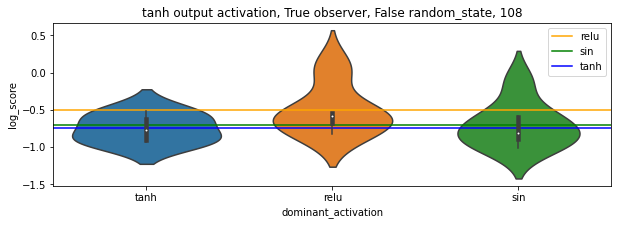

dominant_activation
relu   -0.519574
sin    -0.643757
tanh   -0.757132
Name: log_score, dtype: float32


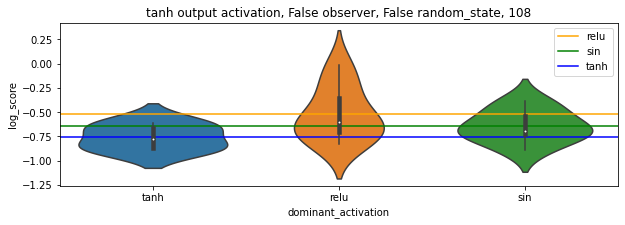

dominant_activation
relu   -1.583439
sin    -0.889089
tanh   -1.007294
Name: log_score, dtype: float32


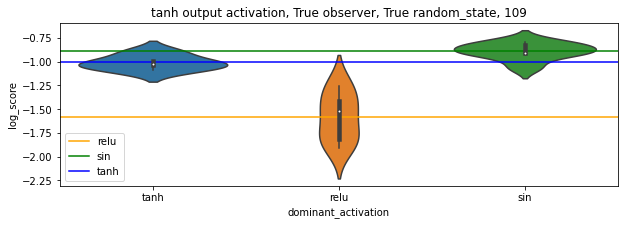

dominant_activation
relu   -1.761078
sin    -1.018583
tanh   -1.201066
Name: log_score, dtype: float32


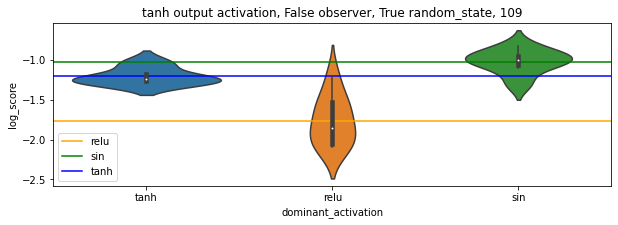

dominant_activation
relu   -0.641744
sin    -0.502671
tanh   -0.923165
Name: log_score, dtype: float32


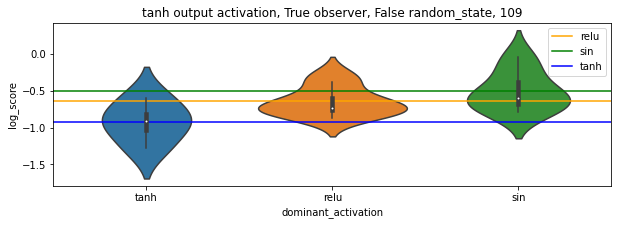

dominant_activation
relu   -0.573563
sin    -0.441053
tanh   -0.997697
Name: log_score, dtype: float32


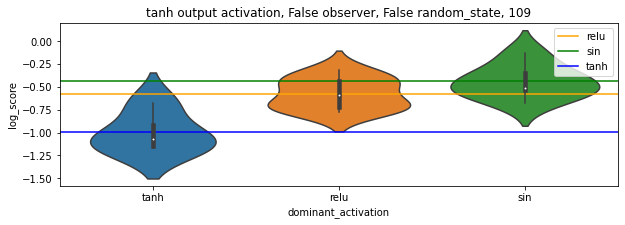

dominant_activation
relu   -1.429923
sin    -1.046412
tanh   -1.341086
Name: log_score, dtype: float32


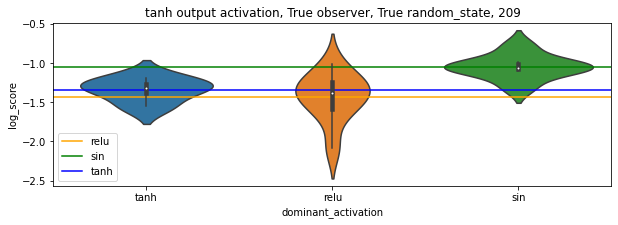

dominant_activation
relu   -1.614848
sin    -1.229686
tanh   -1.947323
Name: log_score, dtype: float32


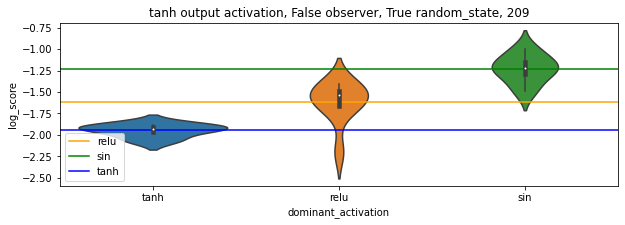

dominant_activation
relu   -0.729097
sin    -0.730424
tanh   -0.708592
Name: log_score, dtype: float32


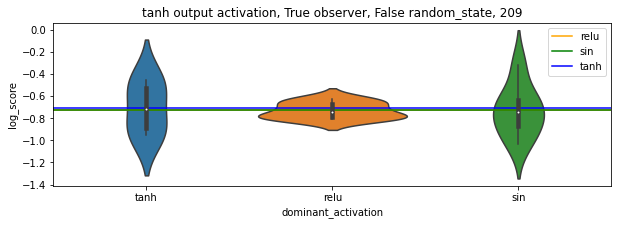

dominant_activation
relu   -0.625972
sin    -0.783527
tanh   -0.775918
Name: log_score, dtype: float32


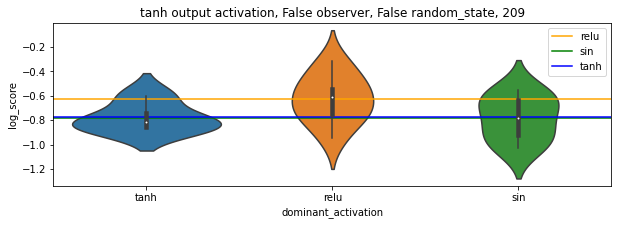

dominant_activation
relu   -1.486719
sin    -0.659924
tanh   -0.851234
Name: log_score, dtype: float32


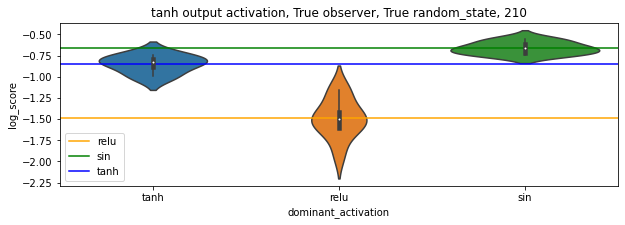

dominant_activation
relu   -1.725079
sin    -0.677590
tanh   -0.909909
Name: log_score, dtype: float32


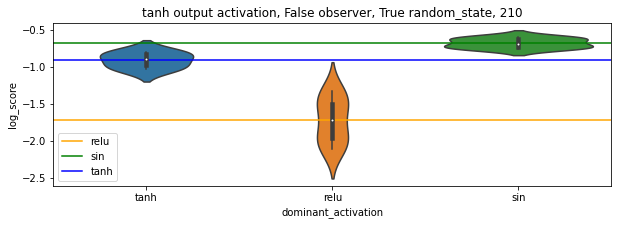

dominant_activation
relu   -0.370559
sin    -0.069116
tanh   -0.666360
Name: log_score, dtype: float32


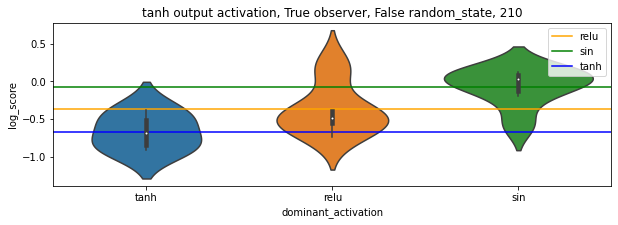

dominant_activation
relu   -0.421660
sin     0.059984
tanh   -0.510059
Name: log_score, dtype: float32


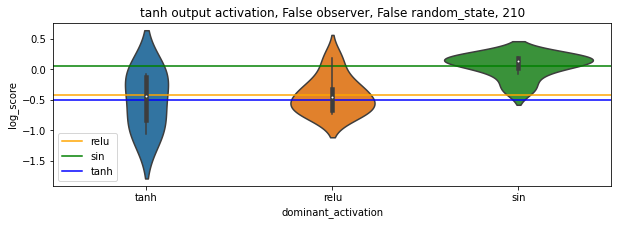

In [96]:
for i in [108, 109, 209, 210]:
    for observer in [True, False]:
        for f_out in [True, False]:
            dominant_activation_plot(df, x = "dominant_activation",
                                     y = "log_score", random_state = i, 
                                     observer = observer, f_out = f_out)
    plt.show()